In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn


In [62]:
columnaFormacionEnCurso = 'FORMACIÓN EN CURSO GRADO Y POSGRADO (indicar en cada caso Carrera e Institución)'
def get_formation_type(row):
    if(pd.isnull(row[columnaFormacionEnCurso])):
        return ''
    value = str(row[columnaFormacionEnCurso])
    valoresGrado = ['Licenciatura', 'licenciatura', 'Tecnicatura', 'Licenciatura']
    if not value:
        return ''
    if any(expectedValue in value for expectedValue in valoresGrado):
        return 'Grado'
    return 'Posgrado'

def get_university(row):
    if(pd.isnull(row[columnaFormacionEnCurso])):
        return ''
    value = str(row[columnaFormacionEnCurso])
    if not value:
        return ''
    univMapper = {'UBA':['UBA'], 'UNDAV':['UNDAV'], 'UNSAM':['IDAES', 'UNSAM'], 'UNLP':['UNLP'], 'UNQ':['UNQ'], 'UNNE':['UNNE'], 'UNR':['UNR'], 'FLACSO': ['flacso','FLACSO'], 'IDES':['IDES'], 'UAM':['UAM']}
    valoresUBA = ['UBA']
    for univName,valuesToMatch in univMapper.items():
        if any(expectedValue in value for expectedValue in valuesToMatch):
            return univName

    return 'pendiente'

def get_cleaned_dni_cuil(df, name):
    result = df[name].replace({' ': '', ',': '', '.': '', '-':'','/':'', '\\':'', '\n':'', "SIN DATOS": ""})
    return result.replace({'': '0'});

def get_no_cleaned_docentes():
    
    docentes= pd.read_excel('listado_siisp.xlsx',skiprows=1)
    docentes['encurso_tipoFormacion'] = docentes.apply(get_formation_type, axis=1)
    docentes['encurso_universidad'] = docentes.apply(get_university, axis=1)
    docentes['GENERO']=docentes['GENERO'].map({'FEMENINO': 'Femenino', 'MASCULINO': 'Masculino', 'OTROS': 'Otro', 'FEMENINI': 'Femenino', 'MASCULINI': 'Masculino'})
    docentes['CUIT/CUIL']=get_cleaned_dni_cuil(docentes, 'CUIT/CUIL')

    return docentes

def get_cleaned_docentes():
    
    docentes= pd.read_excel('listado_siisp.xlsx',skiprows=1)
    docentes['encurso_tipoFormacion'] = docentes.apply(get_formation_type, axis=1)
    docentes['encurso_universidad'] = docentes.apply(get_university, axis=1)
    docentes['GENERO']=docentes['GENERO'].map({'FEMENINO': 'Femenino', 'MASCULINO': 'Masculino', 'OTROS': 'Otro', 'FEMENINI': 'Femenino', 'MASCULINI': 'Masculino'})
    docentes['CUIT/CUIL']=get_cleaned_dni_cuil(docentes, 'CUIT/CUIL')
    docentes['DNI']= get_cleaned_dni_cuil(docentes, 'DNI')
    docentes['DNI'].fillna(value=0, inplace=True)
    docentes['DNI'] = docentes['DNI'].map(lambda x: str(x).replace(u'\xa0', u''))

    return docentes[6:]

def save(df, name):
    df.to_csv('{}.csv'.format(name), encoding='utf-8')
    

docentes = get_cleaned_docentes()
save(docentes, 'investigadores_depurados')


In [50]:
docentes2 = get_no_cleaned_docentes()[6:]
docentes2["DNI"]

6                16638511
7                24775557
8                14258938
9                 3874604
10               22211149
11               25152207
12              31213323 
13               25130690
14                    NaN
15               33606373
16               17836858
17               26505923
18               31369844
19               16402016
20               20303373
21               16760583
22               26600420
23               17890435
24              SIN DATOS
25               28509745
26               20026053
27               26333057
28               28409868
29              SIN DATOS
30               27601830
31               17107125
32               28549080
33                    NaN
34               29866127
35               25314911
              ...        
76              SIN DATOS
77               28166186
78                2215677
79               17203005
80               25264230
81               33104900
82               31884700
83          

In [53]:
docentes["DNI"]

6      16638511
7      24775557
8      14258938
9       3874604
10     22211149
11     25152207
12     31213323
13     25130690
14            0
15     33606373
16     17836858
17     26505923
18     31369844
19     16402016
20     20303373
21     16760583
22     26600420
23     17890435
24            0
25     28509745
26     20026053
27     26333057
28     28409868
29            0
30     27601830
31     17107125
32     28549080
33            0
34     29866127
35     25314911
         ...   
406           0
407    24314613
408    22598898
409    35142709
410    31234258
411    16402232
412    37357962
413    35865160
414           0
415    36025805
416    23078876
417    20682927
418    18651477
419    17362693
420           0
421     6428415
422    25231538
423           0
424    18519259
425           0
426           0
427    32594187
428           0
429    26817555
430    16932639
431    21968867
432           0
433    20268069
434    24269558
435    20203880
Name: DNI, Length: 430, 

In [54]:
docentes[docentes['Apellido']=='ALVAREZ']

,Unnamed: 0,Alta (Fecha),Baja (Fecha),RANGO EDAD,GENERO,Apellido,Unnamed: 6,DNI,CUIT/CUIL,CORREO ELECTRÓNICO,...,CARRERA,ASIGNATURA,CATEGORÍA PROGRAMA DE INCENTIVOS,UNIVERSIDAD DE CATEGORIZACION,AÑO DE CATEGORIZACION,CARRERA CONICET,CATEGORIA CONICET,SUELDO BRUTO ANUAL,encurso_tipoFormacion,encurso_universidad
14,NaN,NaT,NaN,NaN,Masculino,ALVAREZ,Pablo,0,NaN,NaN,...,GESTION CULTURAL,NaN,NO,NaN,NaN,NaN,NaN,NaN,Grado,UNDAV
15,NaN,NaT,NaN,NaN,Femenino,ALVAREZ,Debora Gisele,33606373,27336066730,giselled_88@hotmail.com,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,


Text(0,0.5,'Genero')

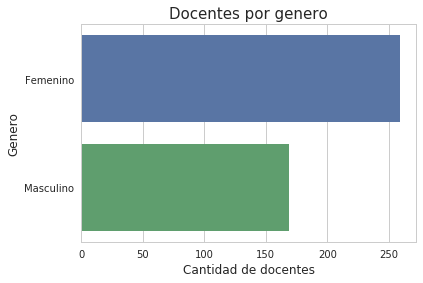

In [55]:
postulantes_estudios_terminados =docentes['GENERO'].value_counts()
g = sns.barplot(x=postulantes_estudios_terminados.values, y=postulantes_estudios_terminados.index, orient='h')
g.set_title("Docentes por genero", fontsize=15)
g.set_xlabel("Cantidad de docentes", fontsize=12)
g.set_ylabel("Genero", fontsize=12)


In [56]:
docentes['GENERO'].value_counts()

Femenino     259
Masculino    169
Name: GENERO, dtype: int64

Text(0,0.5,'Rango de edad')

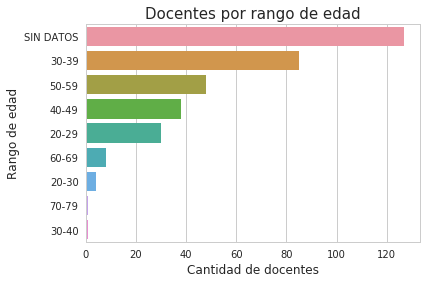

In [57]:
postulantes_estudios_terminados =docentes['RANGO EDAD'].value_counts()
g = sns.barplot(x=postulantes_estudios_terminados.values, y=postulantes_estudios_terminados.index, orient='h')
g.set_title("Docentes por rango de edad", fontsize=15)
g.set_xlabel("Cantidad de docentes", fontsize=12)
g.set_ylabel("Rango de edad", fontsize=12)


In [58]:
docentes['TIPO DE CARGO'].value_counts()

COLABORADOR EXTERNO       77
NO CORRESPONDE            57
PROFESOR ADJUNTO          53
JTP                       35
TITULAR                   29
ESTUDIANTE                26
CONTRATO DOCENTE          19
CONTRATO NO DOCENTE       12
ADJUNTO                   10
AYUDANTE DE 1RA            9
AYUDANTE                   4
PROFESOR ASOCIADO          3
BECARIO                    3
ASISTENCIA TÉCNICA         3
NO DOCENTE                 3
PROFESOR TITULAR           2
SIN DATOS                  2
PROFESOR                   2
EN TRAMITE al 2014         1
TITULAR/ADJUNTO            1
BECARIO CONICET UNDAV      1
ASOCIADO Y ADJUNTO         1
investigador               1
AUXILIAR                   1
PROFESOR                   1
PROFESOR ADSCRIPTO         1
ADSCRIPTO                  1
Name: TIPO DE CARGO, dtype: int64

In [59]:
hombres = docentes[docentes['GENERO']=='MASCULINO']
for_heatmap = hombres.pivot_table(index='TIPO DE CARGO', columns='RANGO EDAD', values='id_n', aggfunc='count')
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Distribucion varones segun cargo y edad", fontsize=22)
g.set_xlabel("Rango de edad",fontsize=18)
g.set_ylabel("Cargo", fontsize=18)

KeyError: 'id_n'

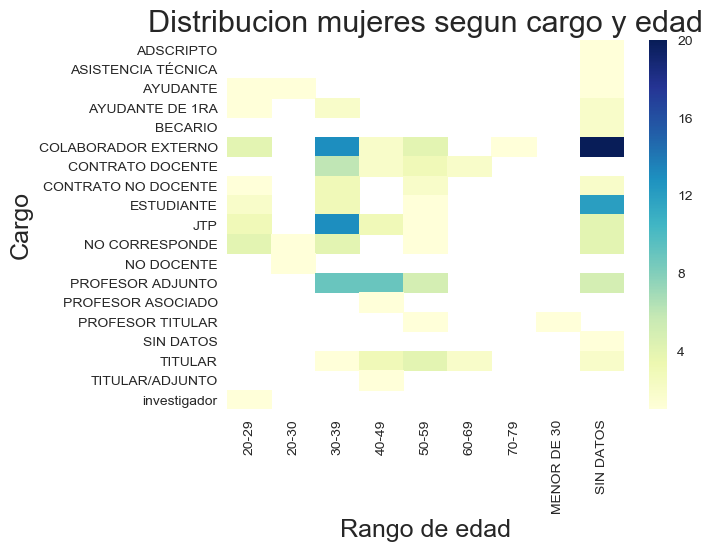

In [41]:
mujeres = docentes[docentes['GENERO']=='FEMENINO']
for_heatmap = mujeres.pivot_table(index='TIPO DE CARGO', columns='RANGO EDAD', values='id_n', aggfunc='count')
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Distribucion mujeres segun cargo y edad", fontsize=22)
g.set_xlabel("Rango de edad",fontsize=18)
g.set_ylabel("Cargo", fontsize=18)

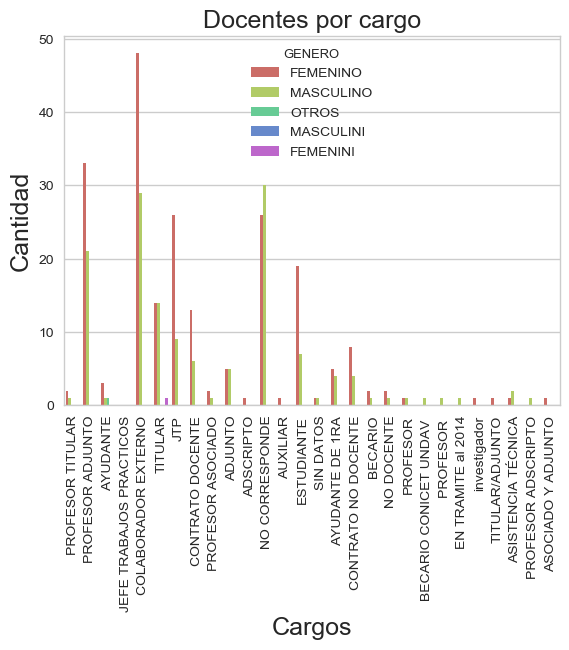

In [45]:

g = sns.countplot(x="TIPO DE CARGO", hue="GENERO", data=docentes,  palette="hls")
g.set_title("Docentes por cargo", fontsize=18)
g.set_xlabel("Cargos", fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_ylabel("Cantidad", fontsize=18)

In [53]:
docentes['RANGO EDAD'].value_counts()

SIN DATOS        127
30-39             86
50-59             49
40-49             39
20-29             30
60-69              9
20-30              4
70-79              1
30-40              1
MENOR DE 30        1
70 Y MAS AÑOS      1
Name: RANGO EDAD, dtype: int64

In [54]:
docentes['TIPO DE CARGO'].value_counts()

COLABORADOR EXTERNO        78
NO CORRESPONDE             57
PROFESOR ADJUNTO           54
JTP                        35
TITULAR                    29
ESTUDIANTE                 26
CONTRATO DOCENTE           19
CONTRATO NO DOCENTE        12
ADJUNTO                    10
AYUDANTE DE 1RA             9
AYUDANTE                    5
BECARIO                     3
ASISTENCIA TÉCNICA          3
PROFESOR ASOCIADO           3
PROFESOR TITULAR            3
NO DOCENTE                  3
PROFESOR                    2
SIN DATOS                   2
AUXILIAR                    1
ADSCRIPTO                   1
BECARIO CONICET UNDAV       1
ASOCIADO Y ADJUNTO          1
PROFESOR                    1
investigador                1
JEFE TRABAJOS PRACTICOS     1
EN TRAMITE al 2014          1
PROFESOR ADSCRIPTO          1
TITULAR/ADJUNTO             1
Name: TIPO DE CARGO, dtype: int64

In [57]:
docentes['BECA  / INSTITUCION '].value_counts()

UNDAV                                                    231
UBA                                                       37
UNLP                                                      23
PROBEVOC                                                  14
CONICET-UNDAV                                             12
PROFAP 3                                                   8
PROFAP 4                                                   6
CONICET - YTEC                                             5
IDES PREJET                                                5
UNPAZ                                                      5
UNQ                                                        4
MUNICIPALIDAD AVELLANEDA                                   4
CONICET                                                    2
UNAM                                                       2
UBA-UNDAV                                                  2
UNAJ                                                       2
UNIVERSITAT POMPEU FABRA